# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/PointNetTest


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [7]:
#読み込むデータのパスの設定

data_path = '/mnt/MachineLearning/data'
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

input_list

['/mnt/MachineLearning/data/office1/inputdata.csv',
 '/mnt/MachineLearning/data/office10/inputdata.csv',
 '/mnt/MachineLearning/data/office15/inputdata.csv',
 '/mnt/MachineLearning/data/office16/inputdata.csv',
 '/mnt/MachineLearning/data/office2/inputdata.csv',
 '/mnt/MachineLearning/data/office22/inputdata.csv',
 '/mnt/MachineLearning/data/office28/inputdata.csv',
 '/mnt/MachineLearning/data/office3/inputdata.csv',
 '/mnt/MachineLearning/data/office7/inputdata.csv',
 '/mnt/MachineLearning/data/office4/inputdata.csv',
 '/mnt/MachineLearning/data/office5/inputdata.csv',
 '/mnt/MachineLearning/data/office6/inputdata.csv',
 '/mnt/MachineLearning/data/office8/inputdata.csv',
 '/mnt/MachineLearning/data/office9/inputdata.csv',
 '/mnt/MachineLearning/data/office14/inputdata.csv']

In [24]:
#input(空調条件等)の読み込み
df_input = None

for input_fname in input_list:
    df_read = pd.read_csv(input_fname)
    if df_input is None:
        df_input = df_read
    else:
        df_input = pd.concat([df_input, df_read], ignore_index=True)

df_input

,case_name,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
0,office1_960_164_aout,960,164,a,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
1,office1_0_205_aout,0,205,a,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
2,office1_660_41_bout,660,41,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
3,office1_960_82_bout,960,82,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
4,office1_960_205_bout,960,205,b,4.76,2.180,1.255,180.0,3.285,3.160,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,office14_960_82_bout,960,82,b,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
427,office14_660_0,660,0,off,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
428,office14_360_246_aout,360,246,a,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN
429,office14_960_0,960,0,off,1.91,3.166,1.255,90.0,3.360,3.166,...,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0,NaN,NaN


In [25]:
df_input.to_csv(data_path+"/ExplanatoryVariables.csv", index=False)

In [26]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [31]:
# office features
office_features_df = df_input.drop(columns=['aircon', 'ventilation', 'exhaust', "aircon_position_x", "aircon_position_y"])

office_features_df

,case_name,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,2_angle,3_x,...,4_x,4_y,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y
0,office1_960_164_aout,4.76,2.180,1.255,180.0,3.285,3.160,1.255,270.0,1.835,...,1.435,1.241,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5
1,office1_0_205_aout,4.76,2.180,1.255,180.0,3.285,3.160,1.255,270.0,1.835,...,1.435,1.241,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5
2,office1_660_41_bout,4.76,2.180,1.255,180.0,3.285,3.160,1.255,270.0,1.835,...,1.435,1.241,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5
3,office1_960_82_bout,4.76,2.180,1.255,180.0,3.285,3.160,1.255,270.0,1.835,...,1.435,1.241,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5
4,office1_960_205_bout,4.76,2.180,1.255,180.0,3.285,3.160,1.255,270.0,1.835,...,1.435,1.241,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,office14_960_82_bout,1.91,3.166,1.255,90.0,3.360,3.166,1.255,90.0,1.910,...,3.360,1.266,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0
427,office14_660_0,1.91,3.166,1.255,90.0,3.360,3.166,1.255,90.0,1.910,...,3.360,1.266,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0
428,office14_360_246_aout,1.91,3.166,1.255,90.0,3.360,3.166,1.255,90.0,1.910,...,3.360,1.266,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0
429,office14_960_0,1.91,3.166,1.255,90.0,3.360,3.166,1.255,90.0,1.910,...,3.360,1.266,1.255,90.0,4.810,1.266,1.255,90.0,7.0,6.0


In [36]:
#count NaN
office_features_df.isnull().values.sum()

0

In [37]:
office_features_df["case_name"] = office_features_df["case_name"].apply(lambda casename: casename.split("_")[0])

In [40]:
office_features_df = office_features_df.drop_duplicates(subset='case_name')

In [41]:
office_features_df.to_csv(data_path+"/office_features.csv", index=False)

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [10]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

In [14]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_221015.csv")

df_summary

,casename,num_drop,volume[ml],RoI,aircon,ventilation,exhaust
0,office2_0_0,6739.4,0.000067,204.224242,0.0,0.0,off
1,office2_0_164_aout,7865.4,0.000063,238.345455,0.0,164.0,a
2,office2_0_164_bout,6049.8,0.000062,183.327273,0.0,164.0,b
3,office2_0_246_aout,7934.4,0.000050,240.436364,0.0,246.0,a
4,office2_0_246_bout,7662.0,0.000082,232.181818,0.0,246.0,b
...,...,...,...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727,960.0,164.0,b
427,office3_960_246_aout,4428.0,0.000073,134.181818,960.0,246.0,a
428,office3_960_246_bout,3890.0,0.000066,117.878788,960.0,246.0,b
429,office3_960_82_aout,5221.2,0.000072,158.218182,960.0,82.0,a


# データ前処理

In [48]:
office_features_df.describe()

,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,2_angle,3_x,3_y,...,4_x,4_y,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y
count,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,...,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000
mean,3.300133,2.781133,1.255000e+00,84.000000,3.626800,3.058733,1.255000e+00,144.000000,3.227467,2.809267,...,3.191400,2.038867,1.255000e+00,120.000000,3.501400,1.652200,1.255000e+00,120.000000,7.400000,5.366667
std,2.017419,1.163640,4.596760e-16,86.503509,1.300124,0.877543,4.596760e-16,106.489436,1.524051,1.228561,...,1.335379,1.247200,4.596760e-16,94.188261,1.385958,1.087701,4.596760e-16,94.188261,1.416737,0.789816
min,0.560000,0.810000,1.255000e+00,0.000000,1.266000,0.940000,1.255000e+00,0.000000,0.940000,0.984000,...,0.985000,0.940000,1.255000e+00,0.000000,0.985000,0.540000,1.255000e+00,0.000000,6.000000,4.000000
25%,1.266000,2.235000,1.255000e+00,0.000000,3.027500,2.640000,1.255000e+00,90.000000,1.872500,1.790500,...,2.575000,1.191000,1.255000e+00,90.000000,2.800000,0.984000,1.255000e+00,90.000000,6.000000,5.250000
50%,3.570000,3.016000,1.255000e+00,90.000000,3.285000,3.059000,1.255000e+00,90.000000,3.016000,3.059000,...,3.016000,1.566000,1.255000e+00,90.000000,2.984000,1.266000,1.255000e+00,90.000000,7.000000,5.500000
75%,4.747000,3.697500,1.255000e+00,135.000000,4.747000,3.530000,1.255000e+00,270.000000,4.662000,3.775000,...,4.177500,2.287500,1.255000e+00,180.000000,4.588000,1.915000,1.255000e+00,180.000000,9.000000,6.000000
max,7.735000,4.515000,1.255000e+00,270.000000,6.260000,4.515000,1.255000e+00,270.000000,5.016000,4.690000,...,5.860000,4.760000,1.255000e+00,270.000000,5.630000,4.760000,1.255000e+00,270.000000,9.500000,6.500000


In [ ]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [ ]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。
"""
officemodel_path = '/mnt/MachineLearning/OfficeModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

sampledPointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        

    pc_aircon = pc_dict[OfficePart.aircon]
    pc_airvent = pc_dict[OfficePart.airvent]
    pc_room = pc_dict[OfficePart.room]
    pc_base = np.concatenate([pc_aircon, pc_airvent, pc_room])
    num_sampling = NUM_POINTS - len(pc_base)

#     pc_forSampling = np.concatenate([pc_dict[OfficePart.body], pc_dict[OfficePart.desks]])
# #     pc_forSampling = pc_dict[OfficePart.desks]
#     print(f'#sampling {num_sampling} from {len(pc_forSampling)}', )
#     rand_list = random.sample(range(len(pc_forSampling)), k=num_sampling)
#     pc_sampled = pc_forSampling[rand_list, :]
    
    num_sampling_body = num_sampling // 2
    num_sampling_desks = num_sampling - num_sampling_body
    
    print("num_sampling_body = ", num_sampling_body)
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=num_sampling_body)
    pc_sampled_body = pc_body[rand_list, :]
    
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    
    
#     pointCloud = np.concatenate([pc_base, pc_sampled])
    pointCloud = np.concatenate([pc_base, pc_sampled_body, pc_sampled_desks])
    print(pointCloud.shape)
    sampledPointCloud_dict[officename] = pointCloud


In [61]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()

In [66]:
import numpy as np

pcFilePath = '/mnt/MachineLearning/OfficeModel/PointCloud_sampled/PointCloud_dict_test.npy'

# np.save(pcFilePath, sampledPointCloud_dict, allow_pickle='TRUE')

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
sampledPointCloud_dict = a.item()
sampledPointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

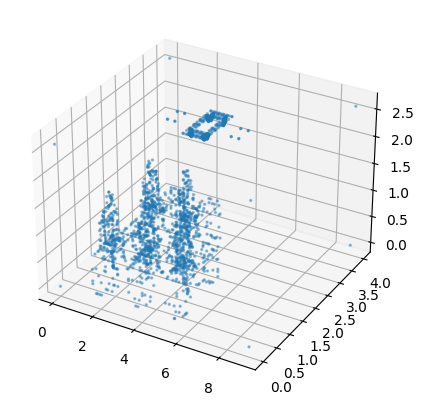

In [67]:
plot3d_points(sampledPointCloud_dict['office9'])

In [68]:
import numpy as np
'''
点群シャッフルによるデータ増強
'''
rng = np.random.default_rng()

pointCloud_augumented_dict = {}
for office_name, pointCloud in sampledPointCloud_dict.items():
    pc_list = []
    for i in range(4):
        pc = pointCloud.copy()

        if i >= 1:
            #点群のシャッフル
            rng.shuffle(pc)

        pc_list.append(pc)

    pointCloud_augumented_dict[office_name] = pc_list

pointCloud_augumented_dict

{'office1': [array([[2.5     , 2.25    , 2.6     ],
         [2.5     , 2.375   , 2.6     ],
         [2.5     , 2.45    , 2.6     ],
         ...,
         [3.825   , 1.733333, 0.7     ],
         [0.925   , 2.875   , 0.05    ],
         [1.495   , 1.278333, 0.53    ]], dtype=float32),
  array([[4.058333 , 1.5      , 0.75     ],
         [4.041667 , 1.55     , 0.05     ],
         [4.720457 , 2.088014 , 0.5705488],
         ...,
         [2.7      , 3.167067 , 2.567067 ],
         [2.794742 , 1.163003 , 1.065941 ],
         [2.824236 , 1.420518 , 0.6001432]], dtype=float32),
  array([[2.731298, 1.165162, 0.621694],
         [1.215   , 1.121667, 0.53    ],
         [2.7     , 3.1     , 2.566467],
         ...,
         [1.391667, 2.225   , 0.75    ],
         [1.651233, 1.132788, 1.077762],
         [3.3     , 2.4     , 2.6     ]], dtype=float32),
  array([[1.080556 , 2.225    , 0.75     ],
         [2.841667 , 2.458333 , 0.75     ],
         [1.445166 , 0.9889464, 0.7154133],
        

In [72]:
def get_augumented_dataset():
    '''
    点群データ増強に合わせて、オフィス特徴量データも複製して増やす
    '''
    
    office_features_df_set = office_features_df.set_index("case_name")
    case_index_list = list(office_features_df_set.index)
    print(case_index_list)

    case_index_augumented_list = []

    pointCloudArray_list = []
    officeFeatures_list = []

    for case_index in case_index_list:
        office_name = case_index.split('_', maxsplit=1)[0]
        pc_list = pointCloud_augumented_dict[office_name]
        for augumentID, pointCloud in enumerate(pc_list):
            case_index_augumented_list.append(case_index + '-' + str(augumentID))
            pointCloudArray_list.append(pointCloud)
            officeFeatures_list.append(office_features_df_set.loc[case_index])

    case_index_array = np.array(case_index_augumented_list)

    pointCloudArray = np.array(pointCloudArray_list)
    officeFeaturesArray = np.array(officeFeatures_list)
    
    return case_index_array, pointCloudArray, officeFeaturesArray

X_index, X_pc, Y = get_augumented_dataset()

['office1', 'office10', 'office15', 'office16', 'office2', 'office22', 'office28', 'office3', 'office7', 'office4', 'office5', 'office6', 'office8', 'office9', 'office14']


In [73]:
# print(X_pc.max())
# X_pc /= X_pc.max() #Normalization
# print(X_pc.max())


#Standardization
X_pc = ( X_pc - X_pc.std() ) / X_pc.std()

X_pc.std()

1.0

In [75]:
print(X_index.shape)

print(X_pc.shape, X_pc.mean(), X_pc.var())

print(Y.shape, Y.mean(), Y.var())

(60,)
(60, 2048, 3) 0.6307596 1.0000001
(60, 22) 30.555866666666667 4819.048813806465


In [76]:
Y

array([[ 4.76 ,  2.18 ,  1.255, ..., 90.   ,  6.   ,  5.5  ],
       [ 4.76 ,  2.18 ,  1.255, ..., 90.   ,  6.   ,  5.5  ],
       [ 4.76 ,  2.18 ,  1.255, ..., 90.   ,  6.   ,  5.5  ],
       ...,
       [ 1.91 ,  3.166,  1.255, ..., 90.   ,  7.   ,  6.   ],
       [ 1.91 ,  3.166,  1.255, ..., 90.   ,  7.   ,  6.   ],
       [ 1.91 ,  3.166,  1.255, ..., 90.   ,  7.   ,  6.   ]])

In [77]:
X_index

array(['office1-0', 'office1-1', 'office1-2', 'office1-3', 'office10-0',
       'office10-1', 'office10-2', 'office10-3', 'office15-0',
       'office15-1', 'office15-2', 'office15-3', 'office16-0',
       'office16-1', 'office16-2', 'office16-3', 'office2-0', 'office2-1',
       'office2-2', 'office2-3', 'office22-0', 'office22-1', 'office22-2',
       'office22-3', 'office28-0', 'office28-1', 'office28-2',
       'office28-3', 'office3-0', 'office3-1', 'office3-2', 'office3-3',
       'office7-0', 'office7-1', 'office7-2', 'office7-3', 'office4-0',
       'office4-1', 'office4-2', 'office4-3', 'office5-0', 'office5-1',
       'office5-2', 'office5-3', 'office6-0', 'office6-1', 'office6-2',
       'office6-3', 'office8-0', 'office8-1', 'office8-2', 'office8-3',
       'office9-0', 'office9-1', 'office9-2', 'office9-3', 'office14-0',
       'office14-1', 'office14-2', 'office14-3'], dtype='<U10')

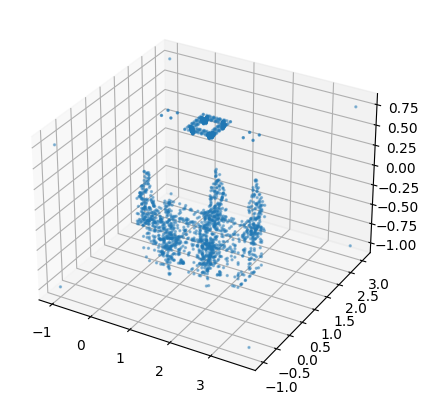

In [80]:
plot3d_points(X_pc[6, :,:])

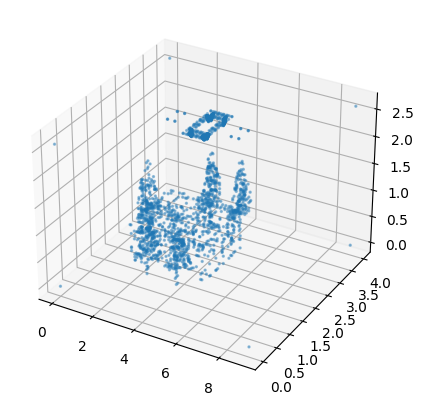

In [81]:
plot3d_points(sampledPointCloud_dict["office7"])

# チューニング

In [206]:
import random

def train_test_office_split(office_for_test:str, case_index_array, train_shuffle:bool):
    '''
    特定のofficeだけ、テスト用に分割。
    '''
    train_ID = []
    test_ID = []

    for (ID, case_index) in enumerate(case_index_array):
        if office_for_test+"-" in case_index:
            test_ID.append(ID) 
        else:
            train_ID.append(ID)
    
    if train_shuffle:
        random.shuffle(train_ID)
    
    return train_ID, test_ID

In [207]:
casename_list = list(office_features_df["case_name"])

office_list = []

for casename in casename_list:
    officename = casename.split('_')[0]
    if officename not in office_list:
        office_list.append(officename)

office_list

['office1',
 'office10',
 'office15',
 'office16',
 'office2',
 'office22',
 'office28',
 'office3',
 'office7',
 'office4',
 'office5',
 'office6',
 'office8',
 'office9',
 'office14']

In [208]:
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]

In [209]:
for test_office in test_office_list:
    print("test_office", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    print(len(fit_ID), len(test_ID))
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    Y_fit, Y_test = Y[fit_ID], Y[test_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    for val_office in val_office_list:
        print("val_office", val_office)
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
        print(len(train_ID), len(val_ID))
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        Y_train, Y_val = Y_fit[train_ID], Y_fit[val_ID]
    
        print(X_index_fit[train_ID])


test_office office1
56 4
val_office office7
52 4
['office28-1' 'office9-2' 'office14-2' 'office10-0' 'office2-2'
 'office3-2' 'office4-1' 'office3-3' 'office5-3' 'office5-2' 'office8-2'
 'office4-0' 'office2-3' 'office9-1' 'office14-3' 'office6-2' 'office10-2'
 'office8-1' 'office22-1' 'office6-3' 'office8-3' 'office15-2' 'office5-1'
 'office28-0' 'office15-1' 'office10-3' 'office9-0' 'office14-1'
 'office22-2' 'office10-1' 'office4-2' 'office8-0' 'office16-2'
 'office14-0' 'office28-2' 'office5-0' 'office6-0' 'office2-0'
 'office22-0' 'office16-0' 'office15-0' 'office3-0' 'office22-3'
 'office16-3' 'office6-1' 'office3-1' 'office15-3' 'office16-1'
 'office28-3' 'office4-3' 'office2-1' 'office9-3']
val_office office10
52 4
['office6-0' 'office6-1' 'office9-3' 'office22-1' 'office7-3' 'office22-3'
 'office2-2' 'office28-0' 'office22-2' 'office5-3' 'office7-2'
 'office28-1' 'office8-0' 'office14-2' 'office8-2' 'office28-3'
 'office15-3' 'office8-3' 'office9-0' 'office14-0' 'office4-3'
 '

In [101]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4332161709054297818
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9965535232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7468885621950953561
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-11-17 01:07:55.374633: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 01:07:55.908271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9503 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [ ]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [210]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/pointNet_test--dropout.db'

NUM_POINTS = X_pc.shape[1]

def total_model_builder(trial):
    """
    PointNet_testモデルを返す
    
    点群を入力し、特徴量ベクトルを出力するNN
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    hp_is_BatchNormalization_necessary = trial.suggest_categorical('is_BatchNormalization_necessary', [True, False])
    if hp_is_BatchNormalization_necessary:
        hp_momentum_bn = trial.suggest_categorical('momentum_bn', [0.0, 0.99])
        
    hp_is_HeNormalization_necessary = trial.suggest_categorical('is_HeNormalization_necessary', [True, False])
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        # if i == hp_conv_layers - 1:
        #     hp_filters = Y.shape[1]
        # else:
        #     hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        # x = conv_bn(x, hp_filters)
        
        if hp_is_HeNormalization_necessary:
            x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid", kernel_initializer="he_normal")(x)
        else:
            x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
            
        if hp_is_BatchNormalization_necessary:
            x = keras.layers.BatchNormalization(momentum=hp_momentum_bn)(x)
            
        x = keras.layers.ReLU()(x)
    
    x = keras.layers.GlobalMaxPooling1D()(x)
    
    # hp_is_dense_bn_necessary = trial.suggest_categorical('is_dense_bn_necessary', [True, False])
    # if hp_is_dense_bn_necessary:
    #     hp_features = trial.suggest_int('features', 8, 64, step=8)
    #     features_pc = dense_bn(x, hp_features)
    # else:
    #     features_pc = x
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)
            
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
    outputs = keras.layers.Dense(Y.shape[1])(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_pointCloud, outputs=outputs, name="testnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        # loss = keras.losses.MeanSquaredError(reduction=keras.losses.Reduction.NONE),
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, X_index_fit, X_pc_fit, Y_fit, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()

    mse_list = []
    
    for val_office in val_office_list:
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        Y_train, Y_val = Y_fit[train_ID], Y_fit[val_ID]
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        model.fit(
            {'pointCloud':X_pc_train}, Y_train,
            validation_data = ({'pointCloud':X_pc_val}, Y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        # evaluate = model.evaluate({'pointCloud':X_pc_val}, Y_val, verbose=0)
        # print(evaluate)

        # mse_list.append(evaluate[0]) #:MSE
        
        Y_val_pred = model.predict({'pointCloud':X_pc_val}, verbose=0)
        mse_array = mean_squared_error(Y_val, Y_val_pred, multioutput='raw_values')
        
        mse_list.append(mse_array[-1]) #:MSE of office_size_y
        
    return np.mean(mse_list)


In [211]:
"""
チューニング実行

最終テスト用オフィスを切り替えながらチューニング
あくまでチューニングのみであり、最終テストオフィスへの評価はここでは行わない
"""
for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    Y_fit, Y_test = Y[fit_ID], Y[test_ID]
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, X_index_fit, X_pc_fit, Y_fit, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


test_office: office1


[I 2022-11-19 02:17:55,145] A new study created in RDB with name: office1_is_test
[I 2022-11-19 02:18:03,695] Trial 0 finished with value: 2.659773390800967 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 32, 'filters-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 512, 'lr': 0.05006156947785916, 'batch_size': 8}. Best is trial 0 with value: 2.659773390800967.
[I 2022-11-19 02:18:13,685] Trial 1 finished with value: 9.098021833082651 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'filters-1': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'lr': 0.02353258551794781, 'batch_size': 4}. Best is trial 0 with value: 2.659773390800967.
[I 2022-11-19 02:18:20,650] Trial 2 finished with value: 0.017624859613397346 and parameters: {'conv_layers': 1, 'is_Batc

test_office: office7


[I 2022-11-19 02:46:49,758] Trial 0 finished with value: 3.0356038870757063 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 224, 'filters-1': 192, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 64, 'units-2': 256, 'lr': 0.00231710439007396, 'batch_size': 4}. Best is trial 0 with value: 3.0356038870757063.
[I 2022-11-19 02:47:30,172] Trial 1 finished with value: 0.49244231853422205 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 96, 'dense_layers': 3, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 128, 'units-1': 384, 'units-2': 192, 'lr': 1.2037098322365813e-05, 'batch_size': 8}. Best is trial 1 with value: 0.49244231853422205.
[I 2022-11-19 02:47:40,964] Trial 2 finished with value: 15.939486995455592 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, '

test_office: office10


[I 2022-11-19 03:15:34,852] Trial 0 finished with value: 0.6697699452952293 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.0, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'lr': 0.0005008039052235854, 'batch_size': 32}. Best is trial 0 with value: 0.6697699452952293.
[I 2022-11-19 03:15:52,982] Trial 1 finished with value: 9.754158630139818 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': True, 'filters-0': 224, 'filters-1': 192, 'filters-2': 96, 'dense_layers': 1, 'activation': 'LeakyReLU', 'dropout': None, 'units-0': 320, 'lr': 0.024510582740375722, 'batch_size': 2}. Best is trial 0 with value: 0.6697699452952293.
[I 2022-11-19 03:16:22,774] Trial 2 finished with value: 1.0396999416646395 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormaliz

test_office: office16


[I 2022-11-19 03:56:29,928] Trial 0 finished with value: 1.2162075027551964 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 64, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 128, 'units-1': 320, 'lr': 0.0012329834901470852, 'batch_size': 32}. Best is trial 0 with value: 1.2162075027551964.
[I 2022-11-19 03:56:45,441] Trial 1 finished with value: 21.95193959280889 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': False, 'filters-0': 224, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 128, 'units-1': 448, 'lr': 0.06272216303186608, 'batch_size': 32}. Best is trial 0 with value: 1.2162075027551964.
[I 2022-11-19 03:56:56,675] Trial 2 finished with value: 0.5737209166006323 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': True, 'momen

test_office: office22


[I 2022-11-19 04:30:18,837] Trial 0 finished with value: 14.510492173881653 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': True, 'filters-0': 160, 'filters-1': 256, 'dense_layers': 0, 'lr': 0.008850127419867347, 'batch_size': 16}. Best is trial 0 with value: 14.510492173881653.
[I 2022-11-19 04:30:41,659] Trial 1 finished with value: 0.9023829200100408 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'lr': 0.0002778076870790927, 'batch_size': 32}. Best is trial 1 with value: 0.9023829200100408.
[I 2022-11-19 04:31:33,709] Trial 2 finished with value: 3.307368920477188 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': False, 'filters-0': 32, 'filters-1': 25

test_office: office28


[I 2022-11-19 04:57:21,900] Trial 0 finished with value: 20.56862345414791 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 4, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 192, 'units-3': 64, 'lr': 0.009538542517888111, 'batch_size': 2}. Best is trial 0 with value: 20.56862345414791.
[I 2022-11-19 04:57:41,071] Trial 1 finished with value: 4.692080396675419 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 160, 'filters-1': 32, 'filters-2': 256, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 384, 'units-1': 384, 'units-2': 128, 'units-3': 128, 'lr': 0.00453577442120159, 'batch_size': 1}. Best is trial 1 with value: 4.692080396675419.
[I 2022-11-19 04:58:01,314] Trial 2 finished with value: 1.102841195632982 and parameters: {'conv_layers':

# チューニング結果確認

In [129]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

#     acc_df = history_df[["mae", "val_mae"]]
#     acc_df.plot()
#     plt.xlabel("epochs")
#     plt.ylabel("MeanAbsoluteError")
#     plt.show()

In [212]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニングの結果で得られたモデルに対して、改めてチューニング時と同じデータセットで学習。
TensorBoardで可視化するのが目的。
最終テストは行わない。
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    train_ID, val_ID = train_test_office_split(val_office_list[0], X_index_fit, train_shuffle=True)
    #チューニング時は検証用オフィスを５回切り替えるが、ここでは検証用オフィスはひとつに固定（時間短縮）

    X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
    Y_train, Y_val = Y_fit[train_ID], Y_fit[val_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        {'pointCloud':X_pc_train}, Y_train,
        validation_data = ({'pointCloud':X_pc_val}, Y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221122-002435
test_office: office1
Model: "testnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pointCloud (InputLayer)     [(None, 2048, 3)]         0         
                                                                 
 conv1d_5 (Conv1D)           (None, 2048, 224)         896       
                                                                 
 re_lu_10 (ReLU)             (None, 2048, 224)         0         
                                                                 
 global_max_pooling1d_5 (Glo  (None, 224)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 22)                4950      
                                                                 
Total params: 5,846
Trainable params: 5,846
No

In [213]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [214]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221122-002435'

In [229]:
import numpy as np
import cv2
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

event_acc = EventAccumulator(
    # path=tb_log_dir,
    "/mnt/MachineLearning/tblogs/20221122-002435/office1/train/events.out.tfevents.1669076675.c52bfff3536b.4162286.24.v2",
    # size_guidance={'images': 0}
)
event_acc.Reload() # ログファイルのサイズによっては非常に時間がかかる

for tag in event_acc.Tags()['images']:
    events = event_acc.Images(tag)
    tag_name = tag.replace('/', '_')
    for index, event in enumerate(events):
        # 画像はエンコードされているので戻す
        s = np.frombuffer(event.encoded_image_string, dtype=np.uint8)
        image = cv2.imdecode(s, cv2.IMREAD_COLOR) # カラー画像の場合
        # 保存
        outpath = '{}_{:04}.jpg'.format(tag_name, index)
        cv2.imwrite(outpath, image)

In [230]:
event_acc.Tags()['images']

[]

In [215]:
%tensorboard  --logdir $tb_log_dir

In [159]:
# for test_office, result_dict in tuning_dict.items():
#     print(f"Best trial (test for {test_office}):")
#     best_trial = result_dict["best_trial"]

#     print("  Value: {}".format(best_trial.value))

#     print("  Params: ")
#     for key, value in best_trial.params.items():
#         print("    {}: {}".format(key, value))
        
#     plot_history(result_dict["history"].history, ymax=3000.)

In [231]:
def test_model_withOffice(test_office:str, storage_path:str):
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    Y_fit, Y_test = Y[fit_ID], Y[test_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage=storage_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        {'pointCloud':X_pc_fit}, Y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = ({'pointCloud':X_pc_test}, Y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    return best_model, test_history

In [253]:
best_model, test_history = test_model_withOffice("office1", 'sqlite:///'+db_path)

test_office: office1
Epoch 1/200
56/56 [==============================] - 1s 4ms/step - loss: 3023.3125 - mae: 21.3547 - val_loss: 2616.9666 - val_mae: 21.2343
Epoch 2/200
56/56 [==============================] - 0s 2ms/step - loss: 2142.3018 - mae: 20.2560 - val_loss: 2058.2297 - val_mae: 19.3242
Epoch 3/200
56/56 [==============================] - 0s 2ms/step - loss: 2123.2334 - mae: 19.4799 - val_loss: 2683.3669 - val_mae: 21.7110
Epoch 4/200
56/56 [==============================] - 0s 2ms/step - loss: 2111.3340 - mae: 20.1008 - val_loss: 2411.5691 - val_mae: 20.9068
Epoch 5/200
56/56 [==============================] - 0s 2ms/step - loss: 2108.2693 - mae: 19.7178 - val_loss: 2536.3315 - val_mae: 21.4978
Epoch 6/200
56/56 [==============================] - 0s 2ms/step - loss: 2104.4851 - mae: 20.0947 - val_loss: 2313.5967 - val_mae: 18.6023
Epoch 7/200
56/56 [==============================] - 0s 2ms/step - loss: 2134.4851 - mae: 19.2828 - val_loss: 2417.0830 - val_mae: 20.9835
Epoch 

In [254]:
fit_ID, test_ID = train_test_office_split("office1", X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
Y_fit, Y_test = Y[fit_ID], Y[test_ID]

In [255]:
Y_fit_pred = best_model.predict({'pointCloud':X_pc_fit})
Y_test_pred = best_model.predict({'pointCloud':X_pc_test})

1/1 [==============================] - 0s 20ms/step


In [256]:
Y_fit_pred

array([[  2.5987818,   3.8845105,   1.2151875, ..., 118.39305  ,
          6.9615245,   5.9869514],
       [  2.5987818,   3.8845105,   1.2151875, ..., 118.39305  ,
          6.9615245,   5.9869514],
       [  2.5987818,   3.8845105,   1.2151875, ..., 118.39305  ,
          6.9615245,   5.9869514],
       ...,
       [  2.5987818,   3.8845105,   1.2151875, ..., 118.39305  ,
          6.9615245,   5.9869514],
       [  2.5987818,   3.8845105,   1.2151875, ..., 118.39305  ,
          6.9615245,   5.9869514],
       [  2.5987818,   3.8845105,   1.2151875, ..., 118.39305  ,
          6.9615245,   5.9869514]], dtype=float32)

In [257]:
Y_fit

array([[ 1.25 ,  3.02 ,  1.255, ..., 90.   ,  7.   ,  6.   ],
       [ 1.25 ,  3.02 ,  1.255, ..., 90.   ,  7.   ,  6.   ],
       [ 1.25 ,  3.02 ,  1.255, ..., 90.   ,  7.   ,  6.   ],
       ...,
       [ 1.91 ,  3.166,  1.255, ..., 90.   ,  7.   ,  6.   ],
       [ 1.91 ,  3.166,  1.255, ..., 90.   ,  7.   ,  6.   ],
       [ 1.91 ,  3.166,  1.255, ..., 90.   ,  7.   ,  6.   ]])

In [258]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# mse_array = mean_squared_error(Y_fit, Y_fit_pred, multioutput='raw_values')

mae_array = mean_absolute_error(Y_fit, Y_fit_pred, multioutput='raw_values')
mae_test_array = mean_absolute_error(Y_test, Y_test_pred, multioutput='raw_values')

In [259]:
pd.Series(data = mae_array, index = office_features_df.columns[1:])

1_x               1.372040
1_y               1.062589
1_z               0.029415
1_angle          65.273653
2_x               0.979129
2_y               1.303560
2_z               0.011130
2_angle          87.637903
3_x               1.367081
3_y               1.307545
3_z               0.224433
3_angle          89.812775
4_x               1.321724
4_y               1.608715
4_z               0.006471
4_angle          80.265227
5_x               1.186847
5_y               0.507000
5_z               0.003639
5_angle          80.271035
office_size_x     0.031934
office_size_y     0.011104
dtype: float64

In [260]:
pd.Series(data = mae_test_array, index = office_features_df.columns[1:])

1_x                1.660079
1_y                0.783440
1_z                0.031708
1_angle          105.590721
2_x                0.368893
2_y                1.037464
2_z                0.005759
2_angle          158.436752
3_x                2.002445
3_y                1.016112
3_z                0.246162
3_angle          138.388596
4_x                2.117676
4_y                0.598777
4_z                0.006864
4_angle           19.495720
5_x                0.801899
5_y                0.264552
5_z                0.002600
5_angle           19.336952
office_size_x      0.033843
office_size_y      0.011448
dtype: float64

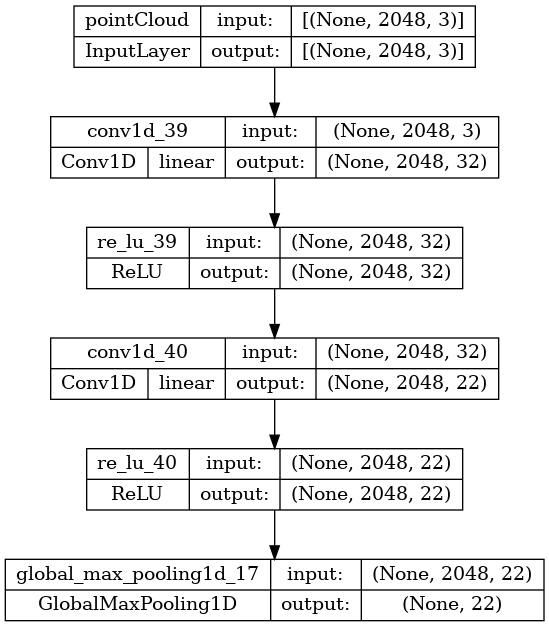

In [138]:
keras.utils.plot_model(best_model, show_shapes=True, show_layer_activations=True,)

In [ ]:
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:

    best_model, test_history = test_model_withOffice(test_office, 'sqlite:///'+db_path)
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


Best trial (test for office1):
  Value: 441.39521484375
  Params: 
    activation: ReLU
    batch_size: 4
    conv_layers: 1
    dense_layers: 3
    dropout: None
    filters-0: 128
    lr: 0.001484260873975492
    units-0: 192
    units-1: 256
    units-2: 256


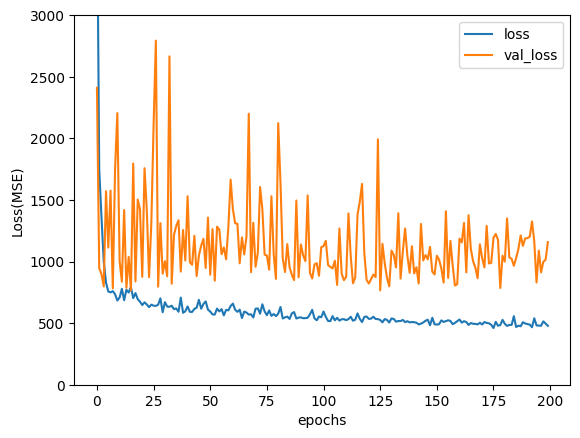

Best trial (test for office7):
  Value: 607.4539627075195
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 3
    dense_layers: 2
    dropout: None
    filters-0: 160
    filters-1: 128
    filters-2: 224
    lr: 0.00011465468388382681
    units-0: 128
    units-1: 320


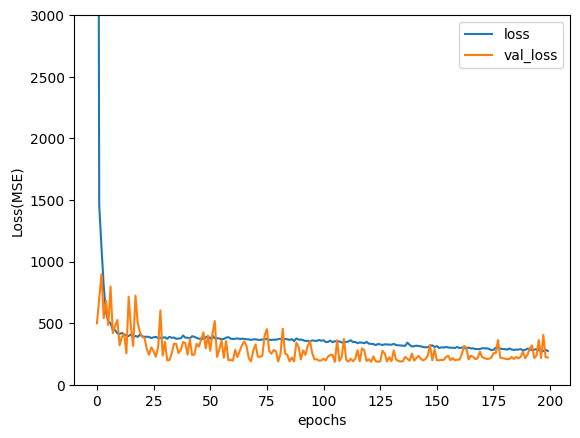

Best trial (test for office10):
  Value: 488.7784057617188
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters-0: 160
    lr: 0.0017008395833957928
    units-0: 512
    units-1: 192


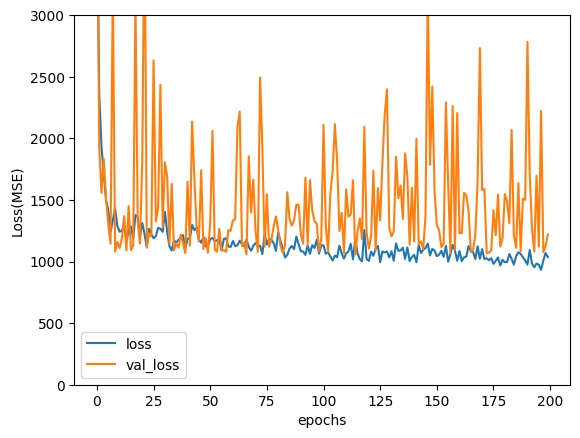

Best trial (test for office16):
  Value: 688.6282531738282
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 192
    filters-1: 160
    lr: 0.0003601297808170332
    units-0: 128
    units-1: 128


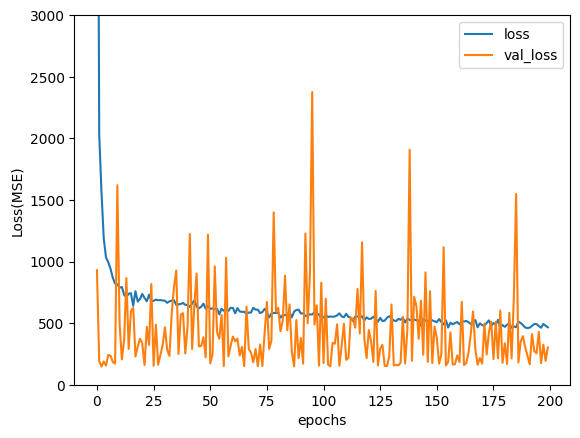

Best trial (test for office22):
  Value: 542.5590087890625
  Params: 
    batch_size: 16
    conv_layers: 1
    dense_layers: 0
    filters-0: 256
    lr: 0.0995425843758946


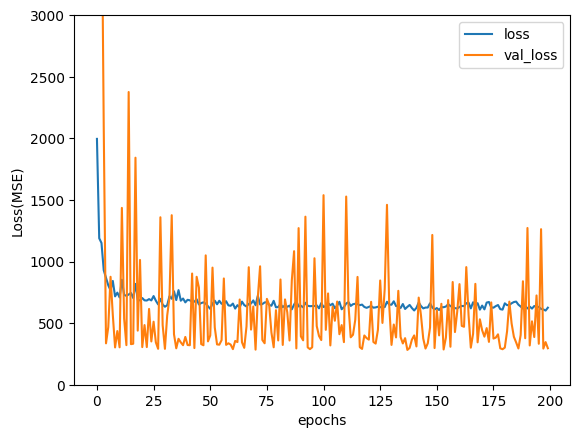

Best trial (test for office28):
  Value: 586.4444274902344
  Params: 
    activation: ReLU
    batch_size: 16
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters-0: 256
    lr: 0.0002858325888340114
    units-0: 320
    units-1: 256


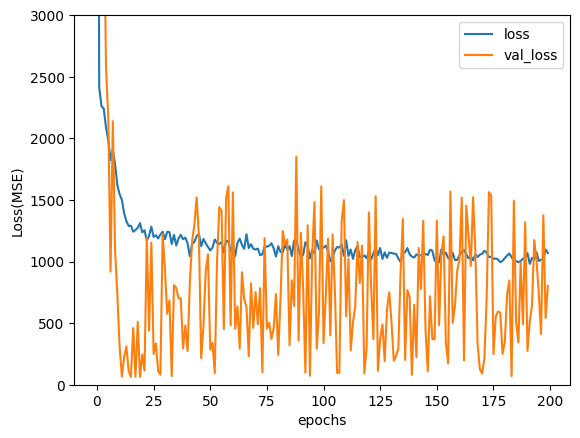

In [141]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True)
        
    plot_history(result_dict["history"].history, ymax=3000.)

In [178]:
db_path = '/mnt/MachineLearning/OptunaLog/officeSplit_study--batch_shuffle.db'

test_office = "office10"

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

# best_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1.e-5),
#     loss='mse',
#     metrics=['mae']
# )

fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
X_index_fit = X_index[fit_ID]

X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
y_fit, y_test = y[fit_ID], y[test_ID]

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

Epoch 1/200
7/7 [==============================] - 1s 76ms/step - loss: 24274.7324 - mae: 151.1248 - val_loss: 16183.7559 - val_mae: 123.2973
Epoch 2/200
7/7 [==============================] - 0s 46ms/step - loss: 7577.1084 - mae: 75.4036 - val_loss: 11159.0020 - val_mae: 100.8254
Epoch 3/200
7/7 [==============================] - 0s 55ms/step - loss: 3902.8201 - mae: 49.6840 - val_loss: 11201.4287 - val_mae: 101.0138
Epoch 4/200
7/7 [==============================] - 0s 50ms/step - loss: 2324.3662 - mae: 39.7494 - val_loss: 11377.0732 - val_mae: 101.8644
Epoch 5/200
7/7 [==============================] - 0s 51ms/step - loss: 2045.8497 - mae: 36.9383 - val_loss: 9879.1504 - val_mae: 94.1893
Epoch 6/200
7/7 [==============================] - 0s 50ms/step - loss: 1924.5459 - mae: 34.5654 - val_loss: 9718.2734 - val_mae: 93.3063
Epoch 7/200
7/7 [==============================] - 0s 48ms/step - loss: 1724.4675 - mae: 33.3373 - val_loss: 9890.2236 - val_mae: 94.2081
Epoch 8/200
7/7 [=======

In [184]:
print(f"Best trial (test for {test_office}):")

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

Best trial (test for office10):
  Value: 460.88736114501955
  Params: 
    activation: ELU
    batch_size: 256
    conv_layers: 1
    dense_layers: 4
    dropout: None
    filters-0: 256
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.0008236973302650423
    units-0: 320
    units-1: 64
    units-2: 192
    units-3: 448


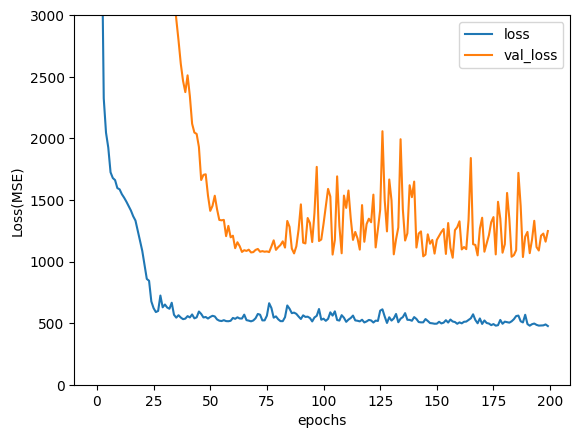

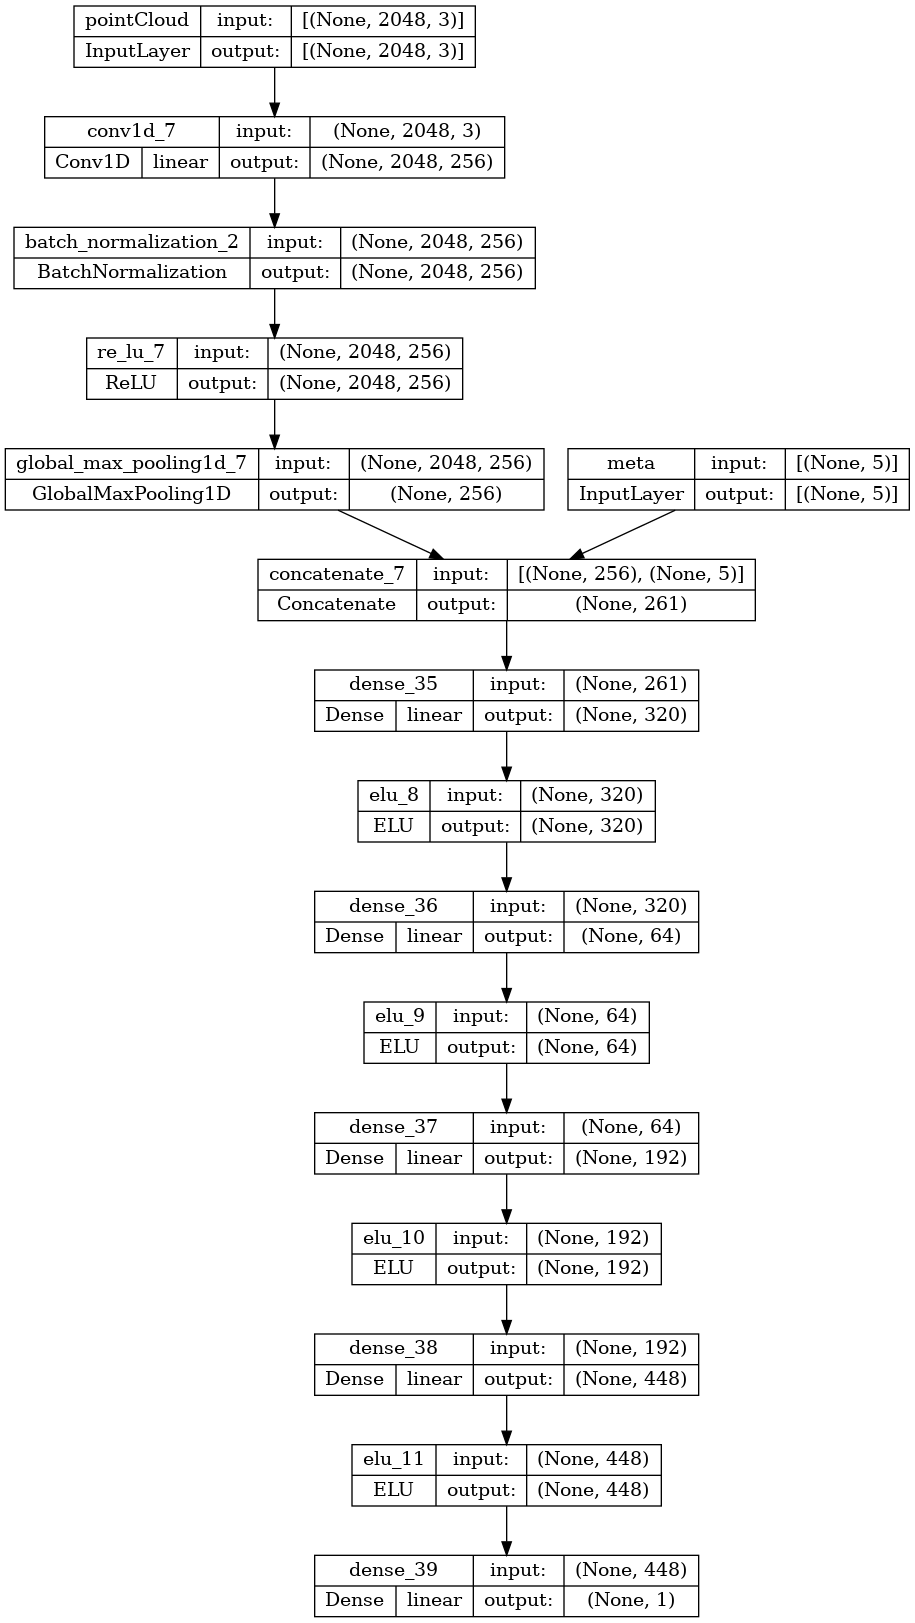

In [181]:
# plot_history(test_history.history)
plot_history(test_history.history, ymax=3000)

keras.utils.plot_model(best_model, show_shapes=True, show_layer_activations=True,)

In [ ]:
test_office = "office1"
result_dict = test_dict[test_office]

print(f"Best trial (test for {test_office}):")
best_trial = result_dict["best_trial"]

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True, show_layer_activations=True,)

In [79]:
import gc
 
gc.collect()

12558

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

best_model = total_model_builder(best_trial)

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)

best_history = best_model.fit(
    {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
    batch_size = 128,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
    callbacks=[estop]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

best_model = total_model_builder(best_trial)

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100)

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = 128,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    callbacks=[estop]
)